<a href="https://colab.research.google.com/github/heychhavi/Loan-Amount-Prediction/blob/main/CiplaDS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Preprocessing

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
import missingno as msno


***1. Generating Data***

We create train and test varibale to store the dataset in dataframe

In [ ]:
train  = pd.read_csv('/content/drive/MyDrive/train.csv')

In [ ]:
test = pd.read_csv('/content/drive/MyDrive/test.csv')


Here, We show the first five rows of train dataset

In [ ]:
train.head()

,Customer_ID,Name,Gender,Age,Income(USD),Income_Stability,Profession,Type_of_Employment,Location,Loan_Amount_Request(USD),Current_Loan_Expenses(USD),Expense_Type_1,Expense_Type_2,Dependents,Credit_Score,No._of_Defaults,Has_Active_Credit_Card,Property_ID,Property_Age,Property_Type,Property_Location,Co-Applicant,Property_Price,Loan_Sanction_Amount(USD)
0,C-36995,Frederica Shealy,F,56,1933.05,Low,Working,Sales staff,Semi-Urban,72809.58,241.08,N,N,3.0,809.44,0,NaN,746,1933.05,4,Rural,1,119933.46,54607.18
1,C-33999,America Calderone,M,32,4952.91,Low,Working,NaN,Semi-Urban,46837.47,495.81,N,Y,1.0,780.40,0,Unpossessed,608,4952.91,2,Rural,1,54791.00,37469.98
2,C-3770,Rosetta Verne,F,65,988.19,High,Pensioner,NaN,Semi-Urban,45593.04,171.95,N,Y,1.0,833.15,0,Unpossessed,546,988.19,2,Urban,0,72440.58,36474.43
3,C-26480,Zoe Chitty,F,65,NaN,High,Pensioner,NaN,Rural,80057.92,298.54,N,Y,2.0,832.70,1,Unpossessed,890,NaN,2,Semi-Urban,1,121441.51,56040.54
4,C-23459,Afton Venema,F,31,2614.77,Low,Working,High skill tech staff,Semi-Urban,113858.89,491.41,N,Y,NaN,745.55,1,Active,715,2614.77,4,Semi-Urban,1,208567.91,74008.28


Let's remove the blank datas from the Loan Sanction Amount. As it will create error during training.

In [ ]:
nan_value = float("NaN") 
train.replace("", nan_value, inplace=True)
train.replace(-999, 0, inplace=True)
train.dropna(subset = ["Loan_Sanction_Amount(USD)"], inplace=True)
test.replace("", nan_value, inplace=True)
test.replace('?', nan_value, inplace=True)

In [ ]:
train['Co-Applicant'] = np.where(train['Co-Applicant']== -999, 1, train['Co-Applicant'])
train.drop(train[train['Property_Price'] < 0].index, inplace = True)

Now, understanding the data

In [ ]:
train.describe()

,Age,Income(USD),Loan_Amount_Request(USD),Current_Loan_Expenses(USD),Dependents,Credit_Score,No._of_Defaults,Property_ID,Property_Age,Property_Type,Co-Applicant,Property_Price,Loan_Sanction_Amount(USD)
count,29660.000000,2.516700e+04,29660.000000,29493.000000,27214.000000,27990.000000,29660.000000,29660.000000,2.490000e+04,29660.000000,29660.000000,2.966000e+04,29660.000000
mean,40.099225,2.630991e+03,88792.057274,406.787558,2.253399,739.853475,0.194066,501.881827,2.631317e+03,2.460013,0.849697,1.317450e+05,47660.726632
std,16.050024,1.131902e+04,59480.995253,219.189268,0.951987,72.152128,0.395487,288.160738,1.137831e+04,1.118695,0.357375,9.340503e+04,48209.776265
min,18.000000,3.777000e+02,6048.240000,0.000000,1.000000,580.000000,0.000000,1.000000,3.777000e+02,1.000000,0.000000,0.000000e+00,0.000000
25%,25.000000,1.650250e+03,41200.112500,247.780000,2.000000,681.732500,0.000000,251.000000,1.649810e+03,1.000000,1.000000,6.065874e+04,0.000000
50%,40.000000,2.223300e+03,75114.085000,375.090000,2.000000,739.815000,0.000000,504.000000,2.223965e+03,2.000000,1.000000,1.099936e+05,35209.395000
75%,55.000000,3.090330e+03,119890.857500,521.050000,3.000000,799.040000,0.000000,751.000000,3.090833e+03,3.000000,1.000000,1.788019e+05,74261.250000
max,65.000000,1.777460e+06,621497.820000,3840.880000,14.000000,896.260000,1.000000,999.000000,1.777460e+06,4.000000,1.000000,1.077967e+06,481907.320000


In [ ]:
test.describe()

,Age,Income(USD),Loan_Amount_Request(USD),Current_Loan_Expenses(USD),Dependents,Credit_Score,No._of_Defaults,Property_ID,Property_Age,Property_Type,Co-Applicant,Property_Price
count,20000.000000,19250.000000,20000.000000,19917.000000,18858.000000,19257.000000,20000.000000,20000.000000,19108.000000,20000.00000,19923.000000,19832.000000
mean,39.940500,2536.995394,88859.077500,408.462359,2.251246,738.821538,0.189500,501.024500,2534.102003,2.47190,0.853486,133466.502461
std,16.097618,1415.908803,60007.331287,215.846532,0.953153,72.406504,0.391915,287.537722,1408.509255,1.12551,0.353630,93334.862301
min,18.000000,368.590000,6185.000000,41.370000,1.000000,580.040000,0.000000,1.000000,368.590000,1.00000,0.000000,7353.500000
25%,25.000000,1659.722500,40889.000000,250.890000,2.000000,680.300000,0.000000,252.000000,1658.397500,1.00000,1.000000,61757.600000
50%,40.000000,2224.590000,74566.000000,374.000000,2.000000,739.300000,0.000000,501.000000,2220.605000,2.00000,1.000000,110871.850000
75%,55.000000,3082.925000,120068.750000,519.570000,3.000000,797.440000,0.000000,748.000000,3082.250000,3.00000,1.000000,179970.650000
max,65.000000,30427.680000,576336.000000,3305.970000,13.000000,893.830000,1.000000,999.000000,30427.680000,4.00000,1.000000,816375.100000


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29660 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Customer_ID                 29660 non-null  object 
 1   Name                        29660 non-null  object 
 2   Gender                      29608 non-null  object 
 3   Age                         29660 non-null  int64  
 4   Income(USD)                 25167 non-null  float64
 5   Income_Stability            28002 non-null  object 
 6   Profession                  29660 non-null  object 
 7   Type_of_Employment          22472 non-null  object 
 8   Location                    29660 non-null  object 
 9   Loan_Amount_Request(USD)    29660 non-null  float64
 10  Current_Loan_Expenses(USD)  29493 non-null  float64
 11  Expense_Type_1              29660 non-null  object 
 12  Expense_Type_2              29660 non-null  object 
 13  Dependents                  272

In [ ]:
train.dtypes

Customer_ID                    object
Name                           object
Gender                         object
Age                             int64
Income(USD)                   float64
Income_Stability               object
Profession                     object
Type_of_Employment             object
Location                       object
Loan_Amount_Request(USD)      float64
Current_Loan_Expenses(USD)    float64
Expense_Type_1                 object
Expense_Type_2                 object
Dependents                    float64
Credit_Score                  float64
No._of_Defaults                 int64
Has_Active_Credit_Card         object
Property_ID                     int64
Property_Age                  float64
Property_Type                   int64
Property_Location              object
Co-Applicant                    int64
Property_Price                float64
Loan_Sanction_Amount(USD)     float64
dtype: object

***2.Convert Categorical variable with numerical values***


Categorial Data such as gender, location, Income Stability etc need to converted into numberical values. 

In [ ]:
train.Gender = train.Gender.replace({"M": 1, "F" : 0})
test.Gender = test.Gender.replace({"M": 1, "F" : 0})

train.Location = train.Location.replace({"Rural": 0, "Semi-Urban" : 1, "Urban":2})
test.Location = test.Location.replace({"Rural": 0, "Semi-Urban" : 1, "Urban":2})

train.Income_Stability = train.Income_Stability.replace({"High": 1,"Low":0})
test.Income_Stability = test.Income_Stability.replace({"High": 1,"Low":0})

train.Expense_Type_1 = train.Expense_Type_1.replace({"Y":1,"N":0})
train.Expense_Type_2 = train.Expense_Type_2.replace({"Y":1,"N":0})
test.Expense_Type_1 = test.Expense_Type_1.replace({"Y":1,"N":0})
test.Expense_Type_2 = test.Expense_Type_2.replace({"Y":1,"N":0})

train.Property_Location = train.Property_Location.replace({"Rural": 0, "Semi-Urban": 1, "Urban":2})
test.Property_Location = test.Property_Location.replace({"Rural": 0, "Semi-Urban": 1, "Urban":2})

train.Has_Active_Credit_Card = train.Has_Active_Credit_Card.replace({"Unpossessed": -1, "Inactive": 0, "Active":1})
test.Has_Active_Credit_Card = test.Has_Active_Credit_Card.replace({"Unpossessed": -1, "Inactive": 0, "Active":1})



*   We need to fill null values with mean and max.




In [ ]:
import missingno as msno

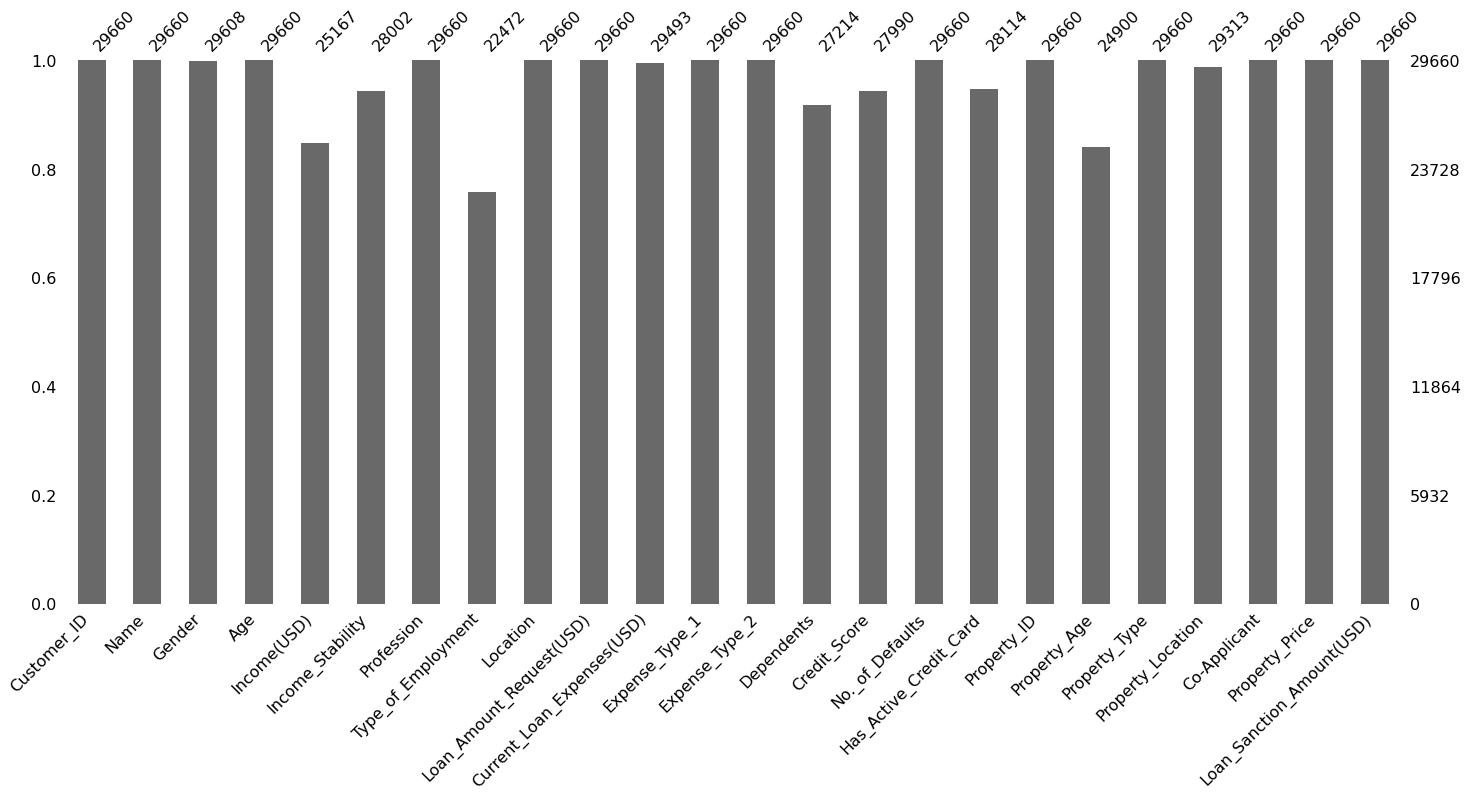

In [ ]:
msno.bar(train)

In [ ]:
train['Gender'].fillna(train['Gender'].max(), inplace=True)
test['Gender'].fillna(test['Gender'].max(), inplace=True)

train['Age'].fillna(train['Age'].mean(), inplace=True)
test['Age'].fillna(test['Age'].mean(), inplace=True)

train['Income(USD)'].fillna(train['Income(USD)'].mean(), inplace = True)
test['Income(USD)'].fillna(test['Income(USD)'].mean(), inplace = True)

train['Income_Stability'].fillna(train['Income_Stability'].max(), inplace = True)
test['Income_Stability'].fillna(test['Income_Stability'].max(), inplace = True)

train['Location'].fillna(train['Location'].min(), inplace = True)
test['Location'].fillna(test['Location'].min(), inplace = True)

train['Current_Loan_Expenses(USD)'].fillna(train['Current_Loan_Expenses(USD)'].mean(), inplace = True)
test['Current_Loan_Expenses(USD)'].fillna(test['Current_Loan_Expenses(USD)'].mean(), inplace = True)

train['Dependents'].fillna(train['Dependents'].min(), inplace = True)
test['Dependents'].fillna(test['Dependents'].min(), inplace = True)

train['Credit_Score'].fillna(train['Credit_Score'].mean(), inplace = True)
test['Credit_Score'].fillna(test['Credit_Score'].mean(), inplace = True)

train['No._of_Defaults'].fillna(train['No._of_Defaults'].min(), inplace = True)
test['No._of_Defaults'].fillna(test['No._of_Defaults'].min(), inplace = True)

train['Has_Active_Credit_Card'].fillna(train['Has_Active_Credit_Card'].min(), inplace=True)
test['Has_Active_Credit_Card'].fillna(test['Has_Active_Credit_Card'].min(), inplace=True)

train['Property_Age'].fillna(train['Property_Age'].mean(), inplace=True)
test['Property_Age'].fillna(test['Property_Age'].mean(), inplace=True)

train['Property_Type'].fillna(train['Property_Type'].min(), inplace=True)
test['Property_Type'].fillna(test['Property_Type'].min(), inplace=True)

train['Property_Location'].fillna(train['Property_Location'].min(), inplace = True)
test['Property_Location'].fillna(test['Property_Location'].min(), inplace = True)

train['Co-Applicant'].fillna(train['Co-Applicant'].max(), inplace = True)
test['Co-Applicant'].fillna(test['Co-Applicant'].max(), inplace = True)

train['Property_Price'].fillna(train['Property_Price'].mean(), inplace=True)
test['Property_Price'].fillna(test['Property_Price'].mean(), inplace = True)





***3. Correlation in features***


In the heatmap we can see the relation between two features and can find the features which are dependent on each other.

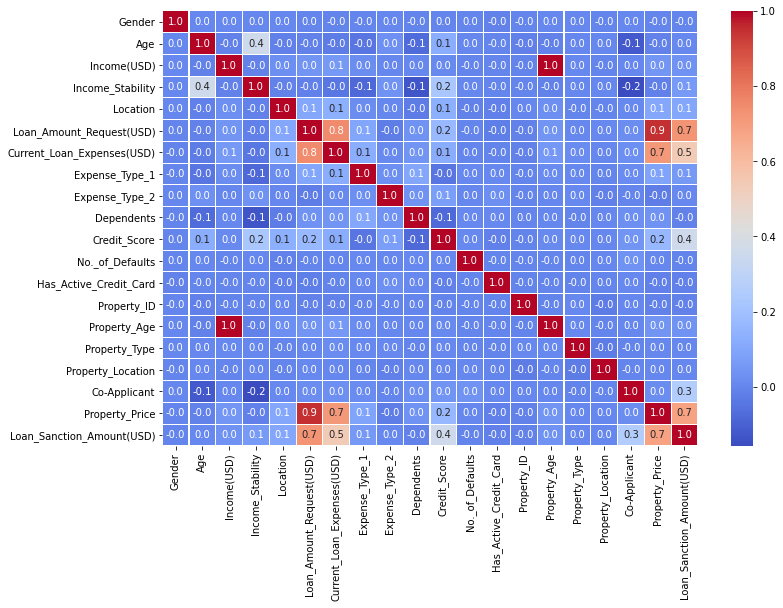

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(train.corr(), cmap='coolwarm', annot=True, fmt='.1f', linewidths=.1)
plt.show()

***Choosing ML Model***

# **Random Forest**

Before fitting the model, We need to decide how many feature are available for testing and training, then after complete this step. fitt the model.

In [ ]:
train_features = ['Age','Income(USD)', 'Income_Stability', 'Location',
                  'Loan_Amount_Request(USD)', 'Credit_Score', 
                    'No._of_Defaults', 
                  'Co-Applicant', 'Dependents', 
                  'Property_Type', 'Property_Location', 'Expense_Type_1', 'Expense_Type_2']

x_train = train[train_features].values
y_train = train['Loan_Sanction_Amount(USD)'].values

x_test = test[train_features].values

Fitting the model

In [ ]:
from sklearn.ensemble import RandomForestRegressor
  
 # create regressor object
regressor = RandomForestRegressor(n_estimators = 300, random_state = 0)
  
# fit the regressor with x and y data
regressor.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=300, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [ ]:
y_pred = regressor.predict(x_test)  # test the output by changing values
test = test.assign(Loan_Sanction_Amount = y_pred)
req_col = ['Customer_ID', 'Loan_Sanction_Amount']
new_column_names = ['Customer ID', 'Loan Sanction Amount (USD)']
test.to_csv('output.csv', columns=req_col, index=False, header=new_column_names)